In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sn

In [2]:
#read features from csv file
df = pd.read_csv('features.csv')
df.set_index('filename', inplace=True)

In [3]:
y = df['genre']
X = df.iloc[:, 1:]
#training/testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [4]:
#loop over to find the best number of estimators
results_forest=[]
for i in range(2, 100):
    forest=RandomForestClassifier(random_state=666,n_estimators=i)
    forest.fit(X_train, y_train)
    results_forest.append(forest.score(X_test, y_test))
    
max_accuracy_forest=max(results_forest)
best_n_est=2+results_forest.index(max(results_forest))
print("The best number of estimators is {}".format(best_n_est))

The best number of estimators is 92


In [5]:
forest=RandomForestClassifier(random_state=666,n_estimators=best_n_est)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=92, n_jobs=None,
            oob_score=False, random_state=666, verbose=0, warm_start=False)

In [6]:
y_pred = forest.predict(X_test)

In [8]:
print('Precision: {0:.3f}%'.format(metrics.precision_score(y_test, y_pred, average='micro') * 100))
print('Recall: {0:.3f}%'.format(metrics.recall_score(y_test, y_pred, average='micro') * 100))
print('Accuracy: {0:.3f}%'.format(metrics.accuracy_score(y_test, y_pred) * 100))
print('Predicted values:\n {}'.format(y_pred))

Precision: 70.500%
Recall: 70.500%
Accuracy: 70.500%
Predicted values:
 ['disco' 'hiphop' 'classical' 'rock' 'disco' 'hiphop' 'blues' 'hiphop'
 'blues' 'classical' 'blues' 'reggae' 'pop' 'rock' 'classical' 'rock'
 'hiphop' 'country' 'reggae' 'rock' 'classical' 'metal' 'disco' 'rock'
 'reggae' 'pop' 'country' 'metal' 'jazz' 'blues' 'blues' 'pop' 'rock'
 'pop' 'classical' 'rock' 'jazz' 'blues' 'country' 'jazz' 'pop'
 'classical' 'country' 'jazz' 'hiphop' 'pop' 'blues' 'metal' 'country'
 'disco' 'classical' 'reggae' 'hiphop' 'country' 'reggae' 'reggae' 'disco'
 'disco' 'jazz' 'reggae' 'country' 'blues' 'disco' 'metal' 'country'
 'country' 'disco' 'classical' 'reggae' 'jazz' 'pop' 'jazz' 'blues' 'rock'
 'country' 'blues' 'rock' 'classical' 'jazz' 'disco' 'country' 'rock'
 'rock' 'metal' 'reggae' 'blues' 'reggae' 'jazz' 'classical' 'classical'
 'pop' 'reggae' 'jazz' 'country' 'blues' 'hiphop' 'metal' 'country'
 'classical' 'country' 'disco' 'metal' 'country' 'classical' 'classical'
 'reggae

In [9]:
#mean accuracy
forest.score(X_train, y_train)

0.99875

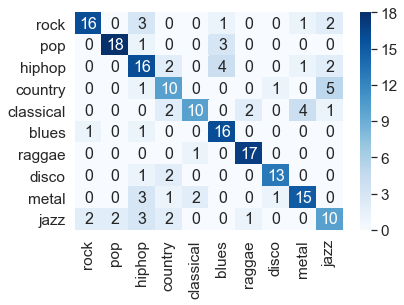

In [10]:
#confusion matrix using seaborn and matplotlib
#found on stackoverflow https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
genres = ['rock', 'pop', 'hiphop', 'country', 'classical', 'blues', 'raggae', 'disco', 'metal', 'jazz']

#create confusion matrix using scikitlearn.metrics
cm = metrics.confusion_matrix(y_test, y_pred)

#create a dataframe confusion matric
df_cm = pd.DataFrame(cm, genres,
                  genres)
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap="Blues")# font size

In [11]:
#classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       blues       0.84      0.70      0.76        23
   classical       0.90      0.82      0.86        22
     country       0.55      0.64      0.59        25
       disco       0.53      0.59      0.56        17
      hiphop       0.77      0.53      0.62        19
        jazz       0.67      0.89      0.76        18
       metal       0.85      0.94      0.89        18
         pop       0.87      0.81      0.84        16
      reggae       0.71      0.68      0.70        22
        rock       0.50      0.50      0.50        20

   micro avg       0.70      0.70      0.70       200
   macro avg       0.72      0.71      0.71       200
weighted avg       0.72      0.70      0.71       200



In [12]:
#now to try with some outside data
new_data = pd.read_csv("demo_features.csv")

In [13]:
X = new_data.iloc[:, 1:]
y_pred = forest.predict(X)

In [14]:
print('Predicted values:\n {}'.format(y_pred))

Predicted values:
 ['hiphop' 'jazz' 'blues' 'reggae' 'jazz' 'country' 'jazz' 'disco' 'jazz'
 'rock']
